In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import ListedColormap
%matplotlib inline 

In [2]:
pip install lasio


In [7]:
import lasio

In [5]:
from google.colab import files
uploaded = files.upload()



Saving 15_9-19_A_CPI.las to 15_9-19_A_CPI.las


In [8]:
las = lasio.read("15_9-19_A_CPI.las")

In [ ]:
las

In [9]:
las.keys()

['DEPTH',
 'BS',
 'BVW',
 'CARB_FLAG',
 'COAL_FLAG',
 'DELTA',
 'GRMAX',
 'GRMIN',
 'J',
 'KLHC_INT',
 'KLOGH',
 'M',
 'N',
 'PERF_FLAG',
 'PHIF',
 'PORD',
 'RHOFL',
 'RHOMA',
 'RW',
 'SAND_FLAG',
 'SW',
 'SWIRR',
 'TEMP',
 'VSH']

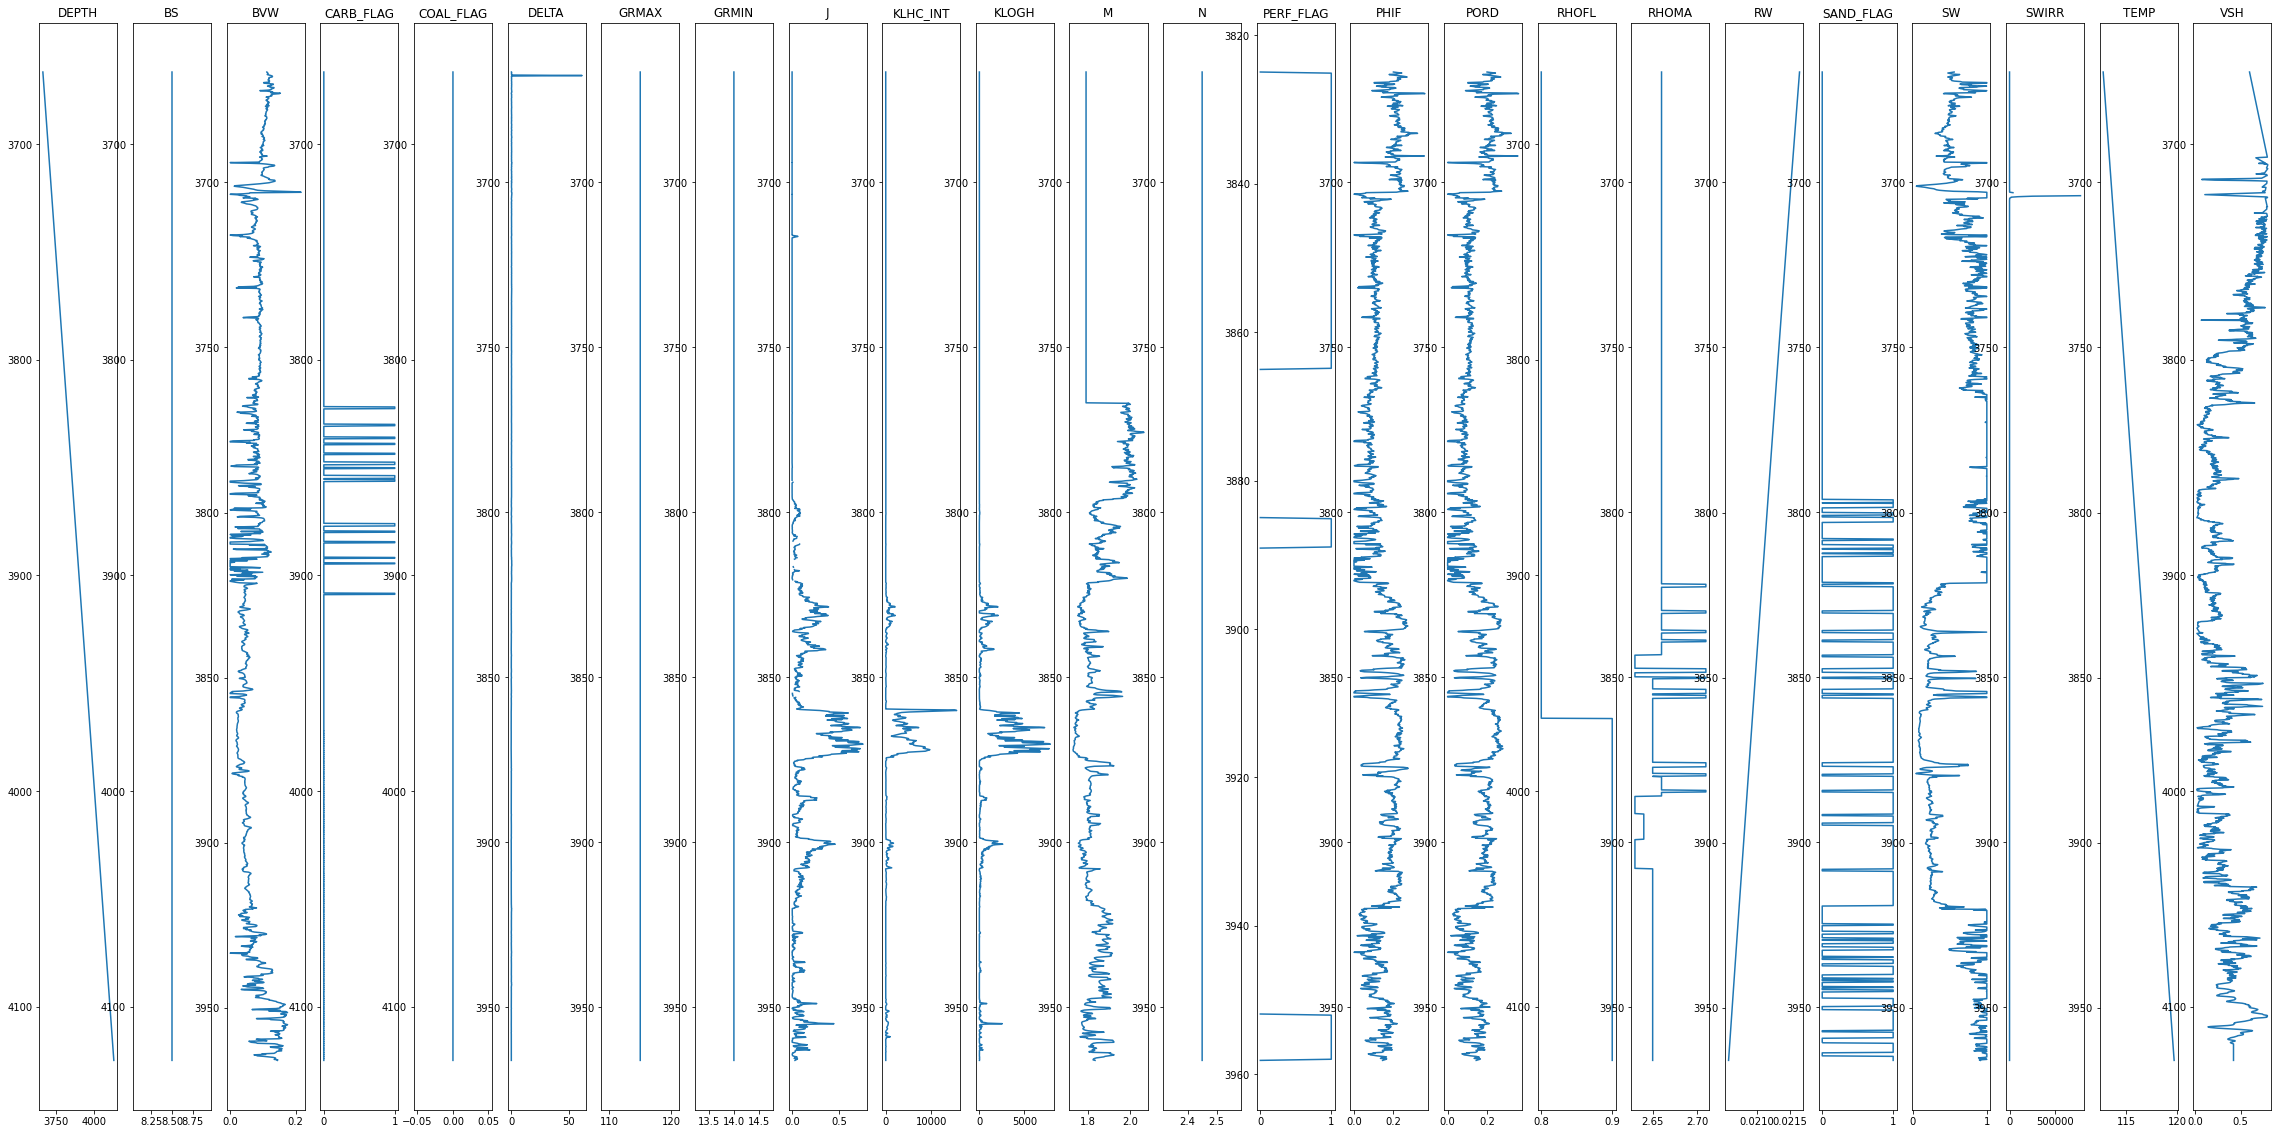

In [ ]:
fig, axes = plt.subplots(1, len(las.keys()), figsize=(40,20))
for i, log in enumerate(las.keys()):
    axes[i].plot(las[log], las['DEPTH'])
    axes[i].invert_yaxis()
    axes[i].set_title(log)



In [ ]:
pip install welly

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 81kB 3.8MB/s 
  Created wheel for welly: filename=welly-0.4.7-cp36-none-any.whl size=51555 sha256=e2346340e9c8723f219c9a5ebc9d2a78f20a9291bb2f4955c565770540f62465
  Stored in directory: /root/.cache/pip/wheels/1f/a6/e3/8543907612eab77a66ec2193df115c2580fd863bea3c092a44
  Created wheel for striplog: filename=striplog-0.8.5-cp36-none-any.whl size=80744 sha256=7e3903a69b7bdd37a4d0566ccb4bb3dcb770da8a753729956691a8bf04e3d2ee
  Stored in directory: /root/.cache/pip/wheels/a6/09/bd/87093a5be4a55cc7cacf9668e2dc0f3c905a1621b120af4820
Successfully built welly striplog


In [ ]:
import welly

In [ ]:
las.keys()


['DEPTH',
 'BS',
 'BVW',
 'CARB_FLAG',
 'COAL_FLAG',
 'DELTA',
 'GRMAX',
 'GRMIN',
 'J',
 'KLHC_INT',
 'KLOGH',
 'M',
 'N',
 'PERF_FLAG',
 'PHIF',
 'PORD',
 'RHOFL',
 'RHOMA',
 'RW',
 'SAND_FLAG',
 'SW',
 'SWIRR',
 'TEMP',
 'VSH']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WLC_PETRO_COMPUTED_OUTPUT_1.LAS to WLC_PETRO_COMPUTED_OUTPUT_1.LAS


In [ ]:
las1 = lasio.read("WLC_PETRO_COMPUTED_OUTPUT_1.LAS")

In [ ]:
las1.keys()

['DEPTH',
 'BVW',
 'COAL_FLAG',
 'KLOGH',
 'PHIF',
 'SAND_FLAG',
 'SW',
 'VCARB',
 'VSH']

In [ ]:
w_ = welly.Well.from_las(las1)


TypeError: ignored

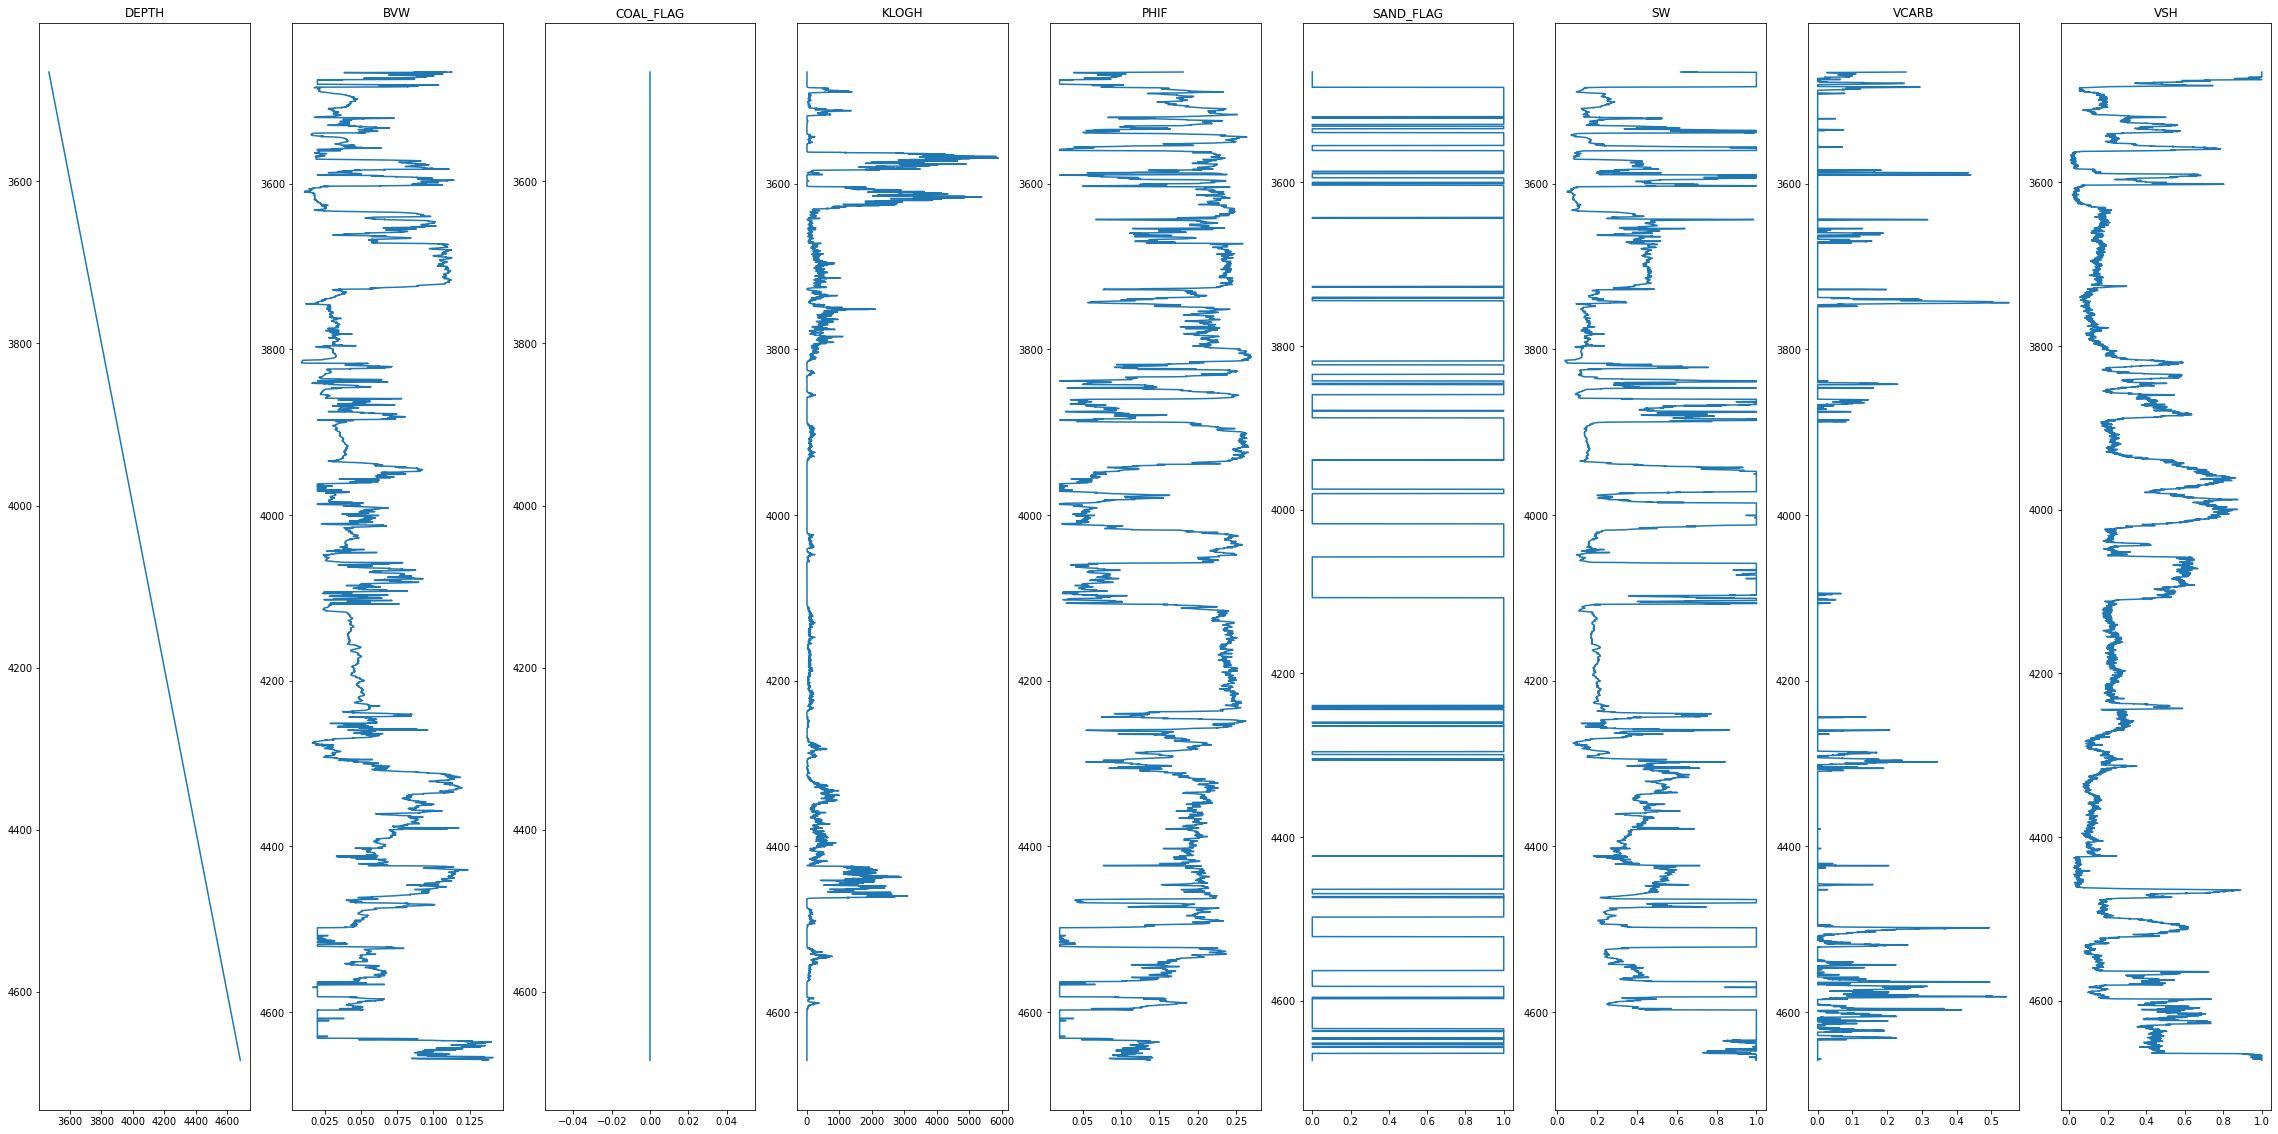

In [ ]:
fig, axes = plt.subplots(1, len(las1.keys()), figsize=(40,20))
for i, log in enumerate(las1.keys()):
    axes[i].plot(las1[log], las1['DEPTH'])
    axes[i].invert_yaxis()
    axes[i].set_title(log)

In [ ]:
def ploting_func(start, stop, to_plot):
    fig, axes = plt.subplots(1, len(to_plot), figsize=(20,10))
    for i, plot in enumerate(to_plot):
        segment = las1.data[plot].to_basis(start=start, stop=stop)
        if plot == 'SAND_FLAG':
            segment.plot_2d(ax=axes[i])
        else:
            segment.plot(ax=axes[i])
        axes[i].set_title(plot)


In [ ]:
las1.keys()

['DEPTH',
 'BVW',
 'COAL_FLAG',
 'KLOGH',
 'PHIF',
 'SAND_FLAG',
 'SW',
 'VCARB',
 'VSH']

In [ ]:
df = las1.df()

In [ ]:
df.head


<bound method NDFrame.head of            BVW  COAL_FLAG  KLOGH    PHIF  SAND_FLAG      SW   VCARB  VSH
DEPTH                                                                   
3465.0  0.1120        0.0  0.001  0.1810        0.0  0.6188  0.2544  1.0
3465.1  0.1128        0.0  0.001  0.1605        0.0  0.7027  0.2091  1.0
3465.2  0.0866        0.0  0.001  0.1375        0.0  0.6299  0.1632  1.0
3465.3  0.1090        0.0  0.001  0.1127        0.0  0.9672  0.1198  1.0
3465.4  0.0869        0.0  0.001  0.0869        0.0  1.0000  0.0812  1.0
...        ...        ...    ...     ...        ...     ...     ...  ...
4684.3     NaN        0.0    NaN     NaN        NaN     NaN     NaN  NaN
4684.4     NaN        0.0    NaN     NaN        NaN     NaN     NaN  NaN
4684.5     NaN        0.0    NaN     NaN        NaN     NaN     NaN  NaN
4684.6     NaN        0.0    NaN     NaN        NaN     NaN     NaN  NaN
4684.7     NaN        0.0    NaN     NaN        NaN     NaN     NaN  NaN

[12198 rows x 8 colu

In [ ]:
df.loc[:, ['KLOGH', 'VSH']] = df[['VSH', 'KLOGH']].to_numpy()
df.head

<bound method NDFrame.head of            BVW  COAL_FLAG  KLOGH    PHIF  SAND_FLAG      SW   VCARB    VSH
DEPTH                                                                     
3465.0  0.1120        0.0    1.0  0.1810        0.0  0.6188  0.2544  0.001
3465.1  0.1128        0.0    1.0  0.1605        0.0  0.7027  0.2091  0.001
3465.2  0.0866        0.0    1.0  0.1375        0.0  0.6299  0.1632  0.001
3465.3  0.1090        0.0    1.0  0.1127        0.0  0.9672  0.1198  0.001
3465.4  0.0869        0.0    1.0  0.0869        0.0  1.0000  0.0812  0.001
...        ...        ...    ...     ...        ...     ...     ...    ...
4684.3     NaN        0.0    NaN     NaN        NaN     NaN     NaN    NaN
4684.4     NaN        0.0    NaN     NaN        NaN     NaN     NaN    NaN
4684.5     NaN        0.0    NaN     NaN        NaN     NaN     NaN    NaN
4684.6     NaN        0.0    NaN     NaN        NaN     NaN     NaN    NaN
4684.7     NaN        0.0    NaN     NaN        NaN     NaN     NaN   

In [ ]:
col_list = list(df)
col_list[2], col_list[-1] = col_list[-1], col_list[2]
df.columns = col_list
df

,BVW,COAL_FLAG,PHIF,VSH,SAND_FLAG,SW,VCARB,KLOGH
DEPTH,,,,,,,,
3465.0,0.1120,0.0,1.0,0.1810,0.0,0.6188,0.2544,0.001
3465.1,0.1128,0.0,1.0,0.1605,0.0,0.7027,0.2091,0.001
3465.2,0.0866,0.0,1.0,0.1375,0.0,0.6299,0.1632,0.001
3465.3,0.1090,0.0,1.0,0.1127,0.0,0.9672,0.1198,0.001
3465.4,0.0869,0.0,1.0,0.0869,0.0,1.0000,0.0812,0.001
...,...,...,...,...,...,...,...,...
4684.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4684.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4684.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
las.keys()

['DEPTH',
 'BS',
 'BVW',
 'CARB_FLAG',
 'COAL_FLAG',
 'DELTA',
 'GRMAX',
 'GRMIN',
 'J',
 'KLHC_INT',
 'KLOGH',
 'M',
 'N',
 'PERF_FLAG',
 'PHIF',
 'PORD',
 'RHOFL',
 'RHOMA',
 'RW',
 'SAND_FLAG',
 'SW',
 'SWIRR',
 'TEMP',
 'VSH']

In [ ]:
df1 = las.df()

In [ ]:
df1.head()

,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
DEPTH,,,,,,,,,,,,,,,,,,,,,,,
3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820


In [ ]:
df1.describe

<bound method NDFrame.describe of             BS       BVW  CARB_FLAG  ...   SWIRR      TEMP       VSH
DEPTH                                ...                            
3666.5916  8.5  0.111705        0.0  ...  1.8023  112.7249  0.598800
3666.7440  8.5  0.112236        0.0  ...  7.9467  112.7285  0.599555
3666.8964  8.5  0.114825        0.0  ...  6.5907  112.7321  0.600310
3667.0488  8.5  0.114419        0.0  ...  8.6274  112.7358  0.601065
3667.2012  8.5  0.115867        0.0  ...  6.8473  112.7394  0.601820
...        ...       ...        ...  ...     ...       ...       ...
4124.2488  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.4012  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.5536  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.7060  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.8584  8.5       NaN        0.0  ...     NaN       NaN  0.422817

[3008 rows x 23 columns]>

In [ ]:
df1.info

<bound method DataFrame.info of             BS       BVW  CARB_FLAG  ...   SWIRR      TEMP       VSH
DEPTH                                ...                            
3666.5916  8.5  0.111705        0.0  ...  1.8023  112.7249  0.598800
3666.7440  8.5  0.112236        0.0  ...  7.9467  112.7285  0.599555
3666.8964  8.5  0.114825        0.0  ...  6.5907  112.7321  0.600310
3667.0488  8.5  0.114419        0.0  ...  8.6274  112.7358  0.601065
3667.2012  8.5  0.115867        0.0  ...  6.8473  112.7394  0.601820
...        ...       ...        ...  ...     ...       ...       ...
4124.2488  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.4012  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.5536  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.7060  8.5       NaN        0.0  ...     NaN       NaN  0.422817
4124.8584  8.5       NaN        0.0  ...     NaN       NaN  0.422817

[3008 rows x 23 columns]>

In [ ]:
col_list = list(df1)
col_list[9], col_list[-1] = col_list[-1], col_list[9]
df1.columns = col_list
df1

,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,VSH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,KLOGH
DEPTH,,,,,,,,,,,,,,,,,,,,,,,
3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124.2488,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
4124.4012,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
4124.5536,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817


In [ ]:
X = df1.iloc[:,:-1].values

In [ ]:
y = df1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X.shape

(3008, 22)

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df1

,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,VSH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,KLOGH
DEPTH,,,,,,,,,,,,,,,,,,,,,,,
3666.5916,8.5,0.111705,0.0,0.0,0.147500,115.0,14.0,0.000163,0.000300,0.0003,1.790000,2.45,0.982036,0.199843,0.199843,0.8,2.660000,0.021643,0.00000,0.559000,1.802300,112.724900,0.598800
3666.7440,8.5,0.112236,0.0,0.0,0.358300,115.0,14.0,0.000003,0.000000,0.0000,1.790000,2.45,0.982036,0.218743,0.218743,0.8,2.660000,0.021642,0.00000,0.513100,7.946700,112.728500,0.599555
3666.8964,8.5,0.114825,0.0,0.0,0.129800,115.0,14.0,0.000004,0.000000,0.0000,1.790000,2.45,0.982036,0.242380,0.242380,0.8,2.660000,0.021642,0.00000,0.473700,6.590700,112.732100,0.600310
3667.0488,8.5,0.114419,0.0,0.0,0.248900,115.0,14.0,0.000002,0.000000,0.0000,1.790000,2.45,0.982036,0.226408,0.226408,0.8,2.660000,0.021641,0.00000,0.505400,8.627400,112.735800,0.601065
3667.2012,8.5,0.115867,0.0,0.0,0.207200,115.0,14.0,0.000004,0.000000,0.0000,1.790000,2.45,0.982036,0.216169,0.216169,0.8,2.660000,0.021640,0.00000,0.536000,6.847300,112.739400,0.601820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124.2488,8.5,0.071881,0.0,0.0,0.146683,115.0,14.0,0.065532,300.311783,247.9583,1.826551,2.45,0.982036,0.142429,0.142860,0.9,2.656355,0.021097,0.39451,0.634597,618.482656,116.227604,0.422817
4124.4012,8.5,0.071881,0.0,0.0,0.146683,115.0,14.0,0.065532,300.311783,247.9583,1.826551,2.45,0.982036,0.142429,0.142860,0.9,2.656355,0.021097,0.39451,0.634597,618.482656,116.227604,0.422817
4124.5536,8.5,0.071881,0.0,0.0,0.146683,115.0,14.0,0.065532,300.311783,247.9583,1.826551,2.45,0.982036,0.142429,0.142860,0.9,2.656355,0.021097,0.39451,0.634597,618.482656,116.227604,0.422817


In [ ]:
df1['TEMP'].fillna((df1['TEMP'].mean()), inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3008 entries, 3666.5916 to 4124.8584
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BS         3008 non-null   float64
 1   BVW        3008 non-null   float64
 2   CARB_FLAG  3008 non-null   float64
 3   COAL_FLAG  3008 non-null   float64
 4   DELTA      3008 non-null   float64
 5   GRMAX      3008 non-null   float64
 6   GRMIN      3008 non-null   float64
 7   J          3008 non-null   float64
 8   KLHC_INT   3008 non-null   float64
 9   VSH        3008 non-null   float64
 10  M          3008 non-null   float64
 11  N          3008 non-null   float64
 12  PERF_FLAG  3008 non-null   float64
 13  PHIF       3008 non-null   float64
 14  PORD       3008 non-null   float64
 15  RHOFL      3008 non-null   float64
 16  RHOMA      3008 non-null   float64
 17  RW         3008 non-null   float64
 18  SAND_FLAG  3008 non-null   float64
 19  SW         3008 non-null   float6

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =  StandardScaler().fit(X)

In [ ]:
X_scaled = scaler.transform(X)


In [ ]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
scaler.mean_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.intercept_

0.0

In [ ]:
lr.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df1

[[1j], [inf]]

In [ ]:
new_data = scaler.transform()

In [ ]:
np.unique(y)

array([0.020048, 0.020602, 0.021119, ..., 0.798689, 0.798997, 0.799147])

In [ ]:
np.unique(X)

array([-1.46100000e-01, -1.40700000e-01, -1.22500000e-01, ...,
        9.32223047e+04,  2.52840547e+05,  7.77015938e+05])

In [ ]:
np.isnan(df1.any())

BS           False
BVW          False
CARB_FLAG    False
COAL_FLAG    False
DELTA        False
GRMAX        False
GRMIN        False
J            False
KLHC_INT     False
VSH          False
M            False
N            False
PERF_FLAG    False
PHIF         False
PORD         False
RHOFL        False
RHOMA        False
RW           False
SAND_FLAG    False
SW           False
SWIRR        False
TEMP         False
KLOGH        False
dtype: bool

In [ ]:
np.isfinite(df1.all())

BS           True
BVW          True
CARB_FLAG    True
COAL_FLAG    True
DELTA        True
GRMAX        True
GRMIN        True
J            True
KLHC_INT     True
VSH          True
M            True
N            True
PERF_FLAG    True
PHIF         True
PORD         True
RHOFL        True
RHOMA        True
RW           True
SAND_FLAG    True
SW           True
SWIRR        True
TEMP         True
KLOGH        True
dtype: bool

In [ ]:
df1[np.isfinite(df1) == True] = 0

In [ ]:
np.all(np.isfinite(df1))

True

In [ ]:
import numpy as geek  
  
print("Finite : ", geek.isfinite(1), "\n") 
  
print("Finite : ", geek.isfinite(0), "\n") 
  
# not a number 
print("Finite : ", geek.isfinite(geek.nan), "\n") 
  
#  infinity 
print("Finite : ", geek.isfinite(geek.inf), "\n") 
  
print("Finite : ", geek.isfinite(geek.NINF), "\n") 

Finite :  True 

Finite :  True 

Finite :  False 

Finite :  False 

Finite :  False 



In [ ]:
print("\n",df1) 
print("\nIs Finite : \n", geek.isfinite(df1)) 
  
  
df1 = [[1j],  
     [geek.inf]] 
print("\nIs Finite : \n", geek.isfinite(df1)) 


             BS  BVW  CARB_FLAG  COAL_FLAG  ...   SW  SWIRR  TEMP  KLOGH
DEPTH                                      ...                         
3666.5916  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
3666.7440  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
3666.8964  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
3667.0488  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
3667.2012  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
...        ...  ...        ...        ...  ...  ...    ...   ...    ...
4124.2488  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
4124.4012  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
4124.5536  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
4124.7060  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0
4124.8584  0.0  0.0        0.0        0.0  ...  0.0    0.0   0.0    0.0

[3008 rows x 23 columns]

Is Finite : 
              BS   BVW